# Geometric Foundations of Data Analysis Assignment 3

In [1]:
import random
import numpy as np
import pandas as pd

# Question 1)

The single-linkeage hierarchial clustering algorithm starts with treating each observation as an individual cluster, and then iteratively merges the clusters until all the data points are merged into a single cluster. These clusters are merged based on the distance between them. In single linkeage clustering  the distance between two clusters is the minimum distance between the members of two clusters i.e. the distance between the two closest points. 

In [2]:
distances = [
    [],
    [11],
    [10, 3],
    [14, 13, 12],
    [22, 21, 20, 16],
]
for j in range(5):
    for i in range(j):
        distances[i].append(distances[j][i])
    distances[j].append(0)
distances = np.array(distances, dtype=float)
distances

array([[ 0., 11., 10., 14., 22.],
       [11.,  0.,  3., 13., 21.],
       [10.,  3.,  0., 12., 20.],
       [14., 13., 12.,  0., 16.],
       [22., 21., 20., 16.,  0.]])

In order for numpy to ignore the 0's on the diagonal, we must first convert all zeros to nan values.

In [3]:
r, c = distances.shape
for i in range(r):
    distances[i][i] = np.nan
distances

array([[nan, 11., 10., 14., 22.],
       [11., nan,  3., 13., 21.],
       [10.,  3., nan, 12., 20.],
       [14., 13., 12., nan, 16.],
       [22., 21., 20., 16., nan]])

Now that this has been done, we will create a function called 'collapse' which will return the minimum value of the matrix and also returns a new matrix.

In [4]:
def collapse(distances):
    min_val = np.nanmin(distances)
    i, j = np.unravel_index(np.nanargmin(distances), distances.shape)
    mat = np.delete(distances, (i,j), axis=1)
    new = np.min(mat[[i,j]], axis=0)
    mat = np.delete(mat, (i,j), axis=0)
    mat = np.append(mat, [new], axis=0)
    new = np.append(new, [np.nan], axis=0)
    mat = np.append(mat, new.reshape(-1, 1), axis=1)
    return min_val, mat

In [5]:
collapse(distances)

(3.0,
 array([[nan, 14., 22., 10.],
        [14., nan, 16., 12.],
        [22., 16., nan, 20.],
        [10., 12., 20., nan]]))

Now we must define our clustering algorithm. As I have explained the algorithm earlier I will not go into detail explaining it again. This clustering function will return a list of the minimum values of the matrix. 

In [6]:
def clustering(distances):
    L = [0.0]
    mat = distances
    while len(mat) > 1:
        val, mat = collapse(mat)
        L.append(val)
    return L

In [7]:
clustering(distances)

[0.0, 3.0, 10.0, 12.0, 16.0]

Now, let's define our distance function. This will calculate the distance between different points in a matrix. And also define our distance metric we will be using, which in this case is euclidean distance. 

In [8]:
def distances(points, dist):
    dist = np.array([[dist(x, y) for x in points] for y in points])
    for i in range(len(dist)):
        dist[i][i] = np.nan
    return dist

In [9]:
class Distance:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return self.name

    def __call__(self, p, q):
        raise NotImplementedError(f"don't know yet how to {self}(p, q).")
        
    def flatten(self, p, q):
        p = np.array(p).flatten()
        q = np.array(q).flatten()
        return p - q

In [10]:
class EuclideanDist(Distance):
    def __call__(self, p, q):
        return np.sqrt(np.sum(self.flatten(p, q)**2))

Now that we have defined our distance metrics. We must create a function to generate clusters around a centre with a certain spread. 

In [11]:
def cluster_points(centre, count, spread):
    xx = [random.normalvariate(centre[0], spread) for _ in range(count)]
    yy = [random.normalvariate(centre[1], spread) for _ in range(count)]
    return xx, yy

In [12]:
def random_clusters(centres, count, spread):
    xx = []
    yy = []
    for c in centres:
        pp = cluster_points(c, count, spread)
        xx.extend(pp[0])
        yy.extend(pp[1])
    return xx, yy

Finally, let's combine all of these steps to perform single-linkeage hierarchial clustering. Our first step is to create an array of points from the transpose of our random clusters data. 

In [13]:
centres = [(x, y) for x in range(4) for y in range(4)]
cc = random_clusters(centres, 10, 0.1)
points = np.array(cc).T

In [14]:
e = EuclideanDist("e")
dd = distances(points, e)
dd

array([[       nan, 0.23012792, 0.36092948, ..., 4.00523353, 4.27860032,
        4.13580593],
       [0.23012792,        nan, 0.16926805, ..., 4.13120969, 4.40046483,
        4.24749542],
       [0.36092948, 0.16926805,        nan, ..., 4.0854663 , 4.35087303,
        4.18996382],
       ...,
       [4.00523353, 4.13120969, 4.0854663 , ...,        nan, 0.28563014,
        0.32386192],
       [4.27860032, 4.40046483, 4.35087303, ..., 0.28563014,        nan,
        0.26414941],
       [4.13580593, 4.24749542, 4.18996382, ..., 0.32386192, 0.26414941,
               nan]])

In [15]:
clu = clustering(dd)
print(clu)

[0.0, 0.0058111138711281415, 0.007621566140480289, 0.01154640267771858, 0.012595468427990645, 0.01310538230986719, 0.013992355075347827, 0.017511203810005205, 0.022222242681530127, 0.022745016594379653, 0.02483214270553694, 0.0249349414623103, 0.026034587441825276, 0.02610406805702015, 0.02669110463402452, 0.02696755235454008, 0.02730556975804188, 0.027445652929564437, 0.027762418962149708, 0.027828410939853, 0.029685167726331976, 0.030144529243185936, 0.03015282199477116, 0.032828814772929385, 0.03432016934981139, 0.0345496163232357, 0.034790429868234496, 0.03497678497058993, 0.03542700448020094, 0.03548674945225245, 0.03676076668943628, 0.03817747928141444, 0.03828747860676646, 0.03857348558182541, 0.038887759467210854, 0.04026763232364098, 0.04157655593658346, 0.04258049609655989, 0.042778438065673954, 0.043624852033497453, 0.04490887829298149, 0.045212390792973484, 0.045678004536571906, 0.04568573248006983, 0.047414521568551034, 0.049288122830437965, 0.049409808816981204, 0.0504654

Now that we have our data points which have been clustered. Let's plot these to get the barcodes.

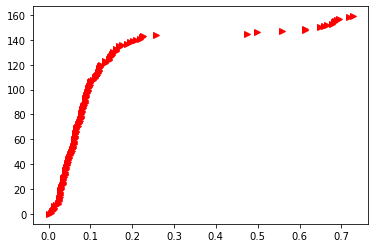

In [16]:
import matplotlib.pyplot as plt
plt.plot(clu, range(160), 'r>')

## Question 2)

In [17]:
random_clusters(centres,10,0.1)

([-0.13173518496389666,
  0.09480344411751104,
  -0.021570205027177113,
  0.11618552115951633,
  0.1556380164112908,
  -0.03575279345049728,
  -0.05878288098522694,
  0.005658092001587717,
  0.22093128867052197,
  -0.031164531466902547,
  0.042421827788643715,
  -0.03913552210238545,
  0.07129181178616474,
  0.09131951054534143,
  0.11932788932173846,
  0.10104259710273791,
  -0.023662655013325044,
  0.04367766757215549,
  -0.059929619867903385,
  0.1441995751486969,
  0.058903443697453976,
  0.12609716309318375,
  -0.04679268871024508,
  0.03677722092445889,
  -0.08707066253026696,
  0.00974487231345531,
  0.023190036067522866,
  -0.014216571865374283,
  0.06824907107092307,
  0.09719287230105343,
  0.03211003779485236,
  0.0063057076035429776,
  -0.12995189754610564,
  0.06594286072881925,
  -0.15152375196806478,
  0.16670423287983221,
  -0.04041413044799393,
  -0.0995796297535201,
  0.04843153598493026,
  0.023894415494448557,
  0.8295086090746027,
  0.9323566129624042,
  1.04255166

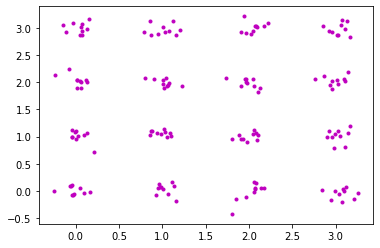

In [18]:
plt.plot(*random_clusters(centres,10,0.1), 'm.')

# Question 3)

Let's now create our taxicab distance metric. 

In [19]:
class TaxicabDist(Distance):
    def __call__(self, p, q):
        return np.sum(np.abs(self.flatten(p, q))) 

In [20]:
t = TaxicabDist("t")

In [21]:
#taxicab distances
dd1 = distances(points, t)
dd1

array([[       nan, 0.28125707, 0.50452745, ..., 5.66200365, 6.05065127,
        5.84308716],
       [0.28125707,        nan, 0.22327038, ..., 5.82574791, 6.21439553,
        6.00683143],
       [0.50452745, 0.22327038,        nan, ..., 5.7394132 , 6.12806082,
        5.92049672],
       ...,
       [5.66200365, 5.82574791, 5.7394132 , ...,        nan, 0.38864762,
        0.4206921 ],
       [6.05065127, 6.21439553, 6.12806082, ..., 0.38864762,        nan,
        0.31059132],
       [5.84308716, 6.00683143, 5.92049672, ..., 0.4206921 , 0.31059132,
               nan]])

In [22]:
#euclidean distances
dd

array([[       nan, 0.23012792, 0.36092948, ..., 4.00523353, 4.27860032,
        4.13580593],
       [0.23012792,        nan, 0.16926805, ..., 4.13120969, 4.40046483,
        4.24749542],
       [0.36092948, 0.16926805,        nan, ..., 4.0854663 , 4.35087303,
        4.18996382],
       ...,
       [4.00523353, 4.13120969, 4.0854663 , ...,        nan, 0.28563014,
        0.32386192],
       [4.27860032, 4.40046483, 4.35087303, ..., 0.28563014,        nan,
        0.26414941],
       [4.13580593, 4.24749542, 4.18996382, ..., 0.32386192, 0.26414941,
               nan]])

# Question 4)

Text(0.5, 1.0, 'Euclidean Distance')

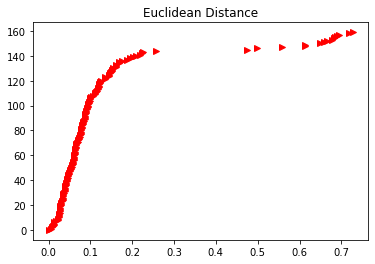

In [23]:
plt.plot(clu, range(160), 'r>')
plt.title('Euclidean Distance')

Text(0.5, 1.0, 'Taxicab Distance')

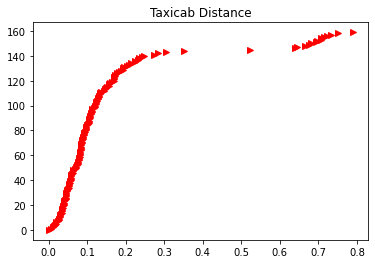

In [24]:
clu1 = clustering(dd1)
plt.plot(clu1, range(160), 'r>')
plt.title('Taxicab Distance')